In [1]:
import pandas as pd
df = pd.read_csv('data\Human_Evaluation_Long.csv')
df

,humen number,rank,question,model
0,1,1.0,1,0
1,2,2.0,1,0
2,3,1.0,1,0
3,4,1.0,1,0
4,5,1.0,1,0
...,...,...,...,...
195,1,3.0,0,3
196,2,3.0,0,3
197,3,3.0,0,3
198,4,4.0,0,3


In [5]:
import pandas as pd
mapping = {1: 4, 2: 3, 3: 2, 4: 1}
df['score'] = df['rank'].map(mapping)
df

,humen number,rank,question,model,score
0,1,1.0,1,0,4
1,2,2.0,1,0,3
2,3,1.0,1,0,4
3,4,1.0,1,0,4
4,5,1.0,1,0,4
...,...,...,...,...,...
195,1,3.0,0,3,2
196,2,3.0,0,3,2
197,3,3.0,0,3,2
198,4,4.0,0,3,1


In [7]:
import pandas as pd
import pingouin as pg
icc_results = pg.intraclass_corr(data=df, targets='model', raters='humen number', ratings='score', nan_policy='omit')
icc_results


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.826705,24.852540,3,16,0.000003,"[0.5, 0.99]"
1,ICC2,Single random raters,0.824680,18.639405,3,12,0.000082,"[0.46, 0.99]"
2,ICC3,Single fixed raters,0.779146,18.639405,3,12,0.000082,"[0.39, 0.98]"
3,ICC1k,Average raters absolute,0.959763,24.852540,3,16,0.000003,"[0.84, 1.0]"
4,ICC2k,Average random raters,0.959216,18.639405,3,12,0.000082,"[0.81, 1.0]"
5,ICC3k,Average fixed raters,0.946350,18.639405,3,12,0.000082,"[0.76, 1.0]"


In [10]:
import pandas as pd
import pingouin as pg

icc_results_by_model = {}

# หาก 'model' มีค่า unique เท่านั้น
unique_models = df['model'].unique()

for model in unique_models:
    # คัดกรองข้อมูลเฉพาะข้อมูลที่มี 'model' เท่ากับค่าปัจจุบันในลูป
    model_data = df[df['model'] == model]
    
    # คำนวณ ICC สำหรับแต่ละกลุ่มข้อมูล
    icc_results = pg.intraclass_corr(data=df, targets='model', raters='humen number', ratings='score', nan_policy='omit')
    
    # เก็บผลลัพธ์ ICC ลงใน Dictionary
    icc_results_by_model[model] = icc_results

# แสดงผลลัพธ์ ICC ของแต่ละ 'model'
for model, icc_result in icc_results_by_model.items():
    print(f"ICC results for model '{model}':\n{icc_result}\n")


ICC results for model '0':
    Type              Description       ICC          F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.826705  24.852540    3   16  0.000003   
1   ICC2     Single random raters  0.824680  18.639405    3   12  0.000082   
2   ICC3      Single fixed raters  0.779146  18.639405    3   12  0.000082   
3  ICC1k  Average raters absolute  0.959763  24.852540    3   16  0.000003   
4  ICC2k    Average random raters  0.959216  18.639405    3   12  0.000082   
5  ICC3k     Average fixed raters  0.946350  18.639405    3   12  0.000082   

          CI95%  
0   [0.5, 0.99]  
1  [0.46, 0.99]  
2  [0.39, 0.98]  
3   [0.84, 1.0]  
4   [0.81, 1.0]  
5   [0.76, 1.0]  

ICC results for model '1':
    Type              Description       ICC          F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.826705  24.852540    3   16  0.000003   
1   ICC2     Single random raters  0.824680  18.639405    3   12  0.000082   
2   ICC3      Single fixed raters  0.7

In [13]:
icc_results_by_model[0]

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.826705,24.852540,3,16,0.000003,"[0.5, 0.99]"
1,ICC2,Single random raters,0.824680,18.639405,3,12,0.000082,"[0.46, 0.99]"
2,ICC3,Single fixed raters,0.779146,18.639405,3,12,0.000082,"[0.39, 0.98]"
3,ICC1k,Average raters absolute,0.959763,24.852540,3,16,0.000003,"[0.84, 1.0]"
4,ICC2k,Average random raters,0.959216,18.639405,3,12,0.000082,"[0.81, 1.0]"
5,ICC3k,Average fixed raters,0.946350,18.639405,3,12,0.000082,"[0.76, 1.0]"


In [12]:
icc_results_by_model[1]

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.826705,24.852540,3,16,0.000003,"[0.5, 0.99]"
1,ICC2,Single random raters,0.824680,18.639405,3,12,0.000082,"[0.46, 0.99]"
2,ICC3,Single fixed raters,0.779146,18.639405,3,12,0.000082,"[0.39, 0.98]"
3,ICC1k,Average raters absolute,0.959763,24.852540,3,16,0.000003,"[0.84, 1.0]"
4,ICC2k,Average random raters,0.959216,18.639405,3,12,0.000082,"[0.81, 1.0]"
5,ICC3k,Average fixed raters,0.946350,18.639405,3,12,0.000082,"[0.76, 1.0]"


In [14]:
icc_results_by_model[2]

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.826705,24.852540,3,16,0.000003,"[0.5, 0.99]"
1,ICC2,Single random raters,0.824680,18.639405,3,12,0.000082,"[0.46, 0.99]"
2,ICC3,Single fixed raters,0.779146,18.639405,3,12,0.000082,"[0.39, 0.98]"
3,ICC1k,Average raters absolute,0.959763,24.852540,3,16,0.000003,"[0.84, 1.0]"
4,ICC2k,Average random raters,0.959216,18.639405,3,12,0.000082,"[0.81, 1.0]"
5,ICC3k,Average fixed raters,0.946350,18.639405,3,12,0.000082,"[0.76, 1.0]"


In [15]:
icc_results_by_model[3]

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.826705,24.852540,3,16,0.000003,"[0.5, 0.99]"
1,ICC2,Single random raters,0.824680,18.639405,3,12,0.000082,"[0.46, 0.99]"
2,ICC3,Single fixed raters,0.779146,18.639405,3,12,0.000082,"[0.39, 0.98]"
3,ICC1k,Average raters absolute,0.959763,24.852540,3,16,0.000003,"[0.84, 1.0]"
4,ICC2k,Average random raters,0.959216,18.639405,3,12,0.000082,"[0.81, 1.0]"
5,ICC3k,Average fixed raters,0.946350,18.639405,3,12,0.000082,"[0.76, 1.0]"


In [21]:
grouped_scores = df.groupby('model')['score'].sum()
grouped_scores

model
0    174
1    133
2    118
3     75
Name: score, dtype: int64

In [22]:
df_grouped_scores = pd.DataFrame({'model': grouped_scores.index, 'score': grouped_scores.values})
df_grouped_scores

,model,score
0,0,174
1,1,133
2,2,118
3,3,75


In [23]:
import pandas as pd
mapping = {0:'LexRank', 1:'TextRank', 2:'Pegasus', 3: 'Bart	'}
df_grouped_scores['model'] = df_grouped_scores['model'].map(mapping)
df_grouped_scores

,model,score
0,LexRank,174
1,TextRank,133
2,Pegasus,118
3,Bart\t,75


c:\Users\CPE\OneDrive\Desktop\hackaday\.conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


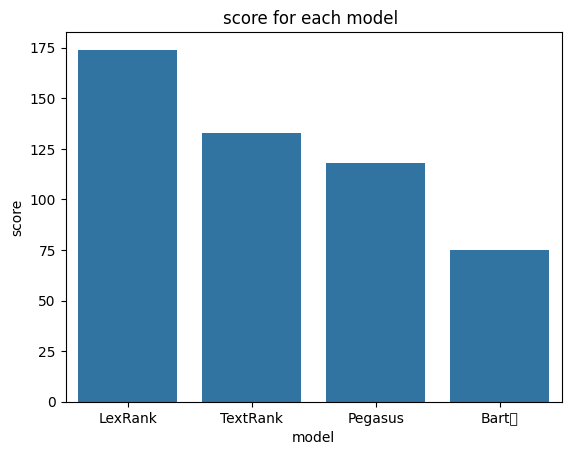

In [28]:
import pandas as pd
import seaborn as sns
sns.barplot(x="model", y="score", data=df_grouped_scores)
plt.title('score for each model ')
plt.show()


In [29]:
variance = df['score'].var()
print(variance)

1.256281407035176
